# Utility that reads the result tables from markdown and plots them

In [226]:
import re
import matplotlib.pyplot as plt

def parse_markdown(filepath, left_group = 2, right_group = 7):
    with open(filepath, 'r') as file:
        lines = file.readlines()

    thread_counts = []
    min_times = []

    # Regex to extract the relevant data
    regex = re.compile(r'\|\s*(\d+)\s*\|\s*(\d+)\s*\|\s*(\d+)\s*\|\s*(\d+)ms\s*\|\s*(\d+)ms\s*\|\s*(\d+)ms\s*\|\s*(\d+)ms\s*\|\s*([\d.]+)\s*\|\s*([\d.]+)\s*\|')
    
    for line in lines:
        match = regex.match(line)
        if match:
            thread_counts.append(int(match.group(left_group)))
            min_times.append(float(match.group(right_group)))

    return thread_counts, min_times

def plot_min_times(thread_counts, min_times, filesize, machine, solution, main_title = "Minimum Execution Time", y_label = 'Minimum Execution Time (ms)'):
    plt.figure(figsize=(10, 6))
    plt.plot(thread_counts, min_times, marker='o')
    plt.title(f'{main_title}, solution {solution}, machine {machine}, input file size {filesize}MB.')
    plt.xlabel('Thread Count')
    plt.ylabel(f'{y_label}')
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True, which="both", ls="--")
    plt.xticks(thread_counts, thread_counts)  # Ensure all thread counts are shown on the x-axis
    plt.savefig(f'img/{solution}_{filesize}_{machine}_times')
    plt.show()


In [227]:
def plot_sp_values(thread_counts, sp_values, filesize, machine, solution, main_title="Speedup (Sp)", y_label='Speedup (Sp)'):
    plt.figure(figsize=(10, 6))
    plt.plot(thread_counts, sp_values, marker='o', color = 'orange')
    plt.title(f'{main_title}, solution {solution}, machine {machine}, input file size {filesize}MB.')
    plt.xlabel('Thread Count')
    plt.ylabel(f'{y_label}')
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True, which="both", ls="--")
    plt.xticks(thread_counts, thread_counts)  # Ensure all thread counts are shown on the x-axis
    plt.savefig(f'img/{solution}_{filesize}_{machine}_sp')
    plt.show()


## ReadOneByOne

In [228]:
SOLUTION_DIR = "ReadOneByOne"
MACHINE = "HomePC"

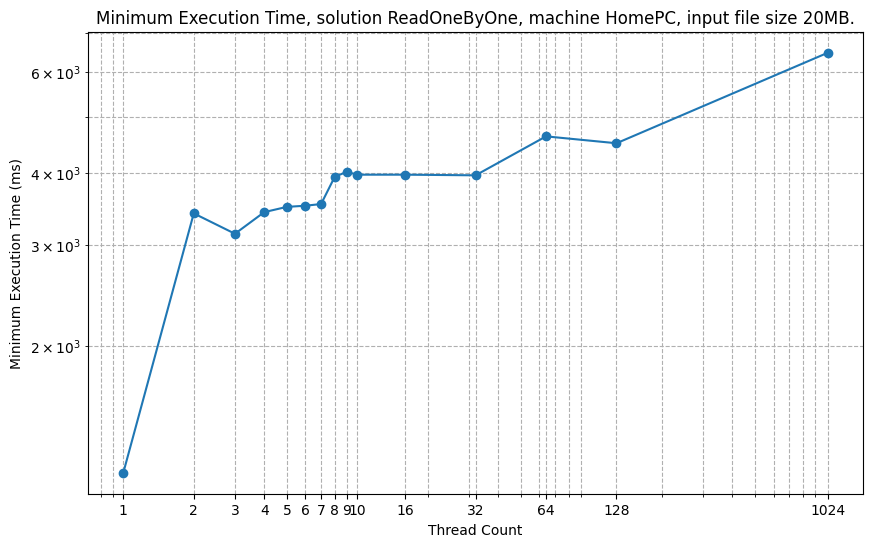

In [229]:
FILESIZE = 20
filepath = f'{SOLUTION_DIR}/execution_times_{FILESIZE}MB.md'

thread_counts, min_times = parse_markdown(filepath)
plot_min_times(thread_counts, min_times, FILESIZE, MACHINE, SOLUTION_DIR)

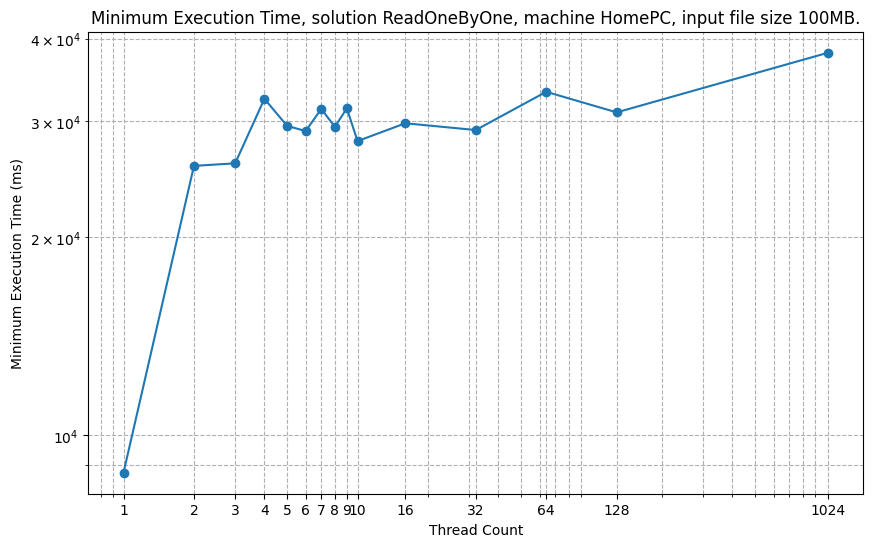

In [230]:
FILESIZE = 100
filepath = f'{SOLUTION_DIR}/execution_times_{FILESIZE}MB.md'

thread_counts, min_times = parse_markdown(filepath)
plot_min_times(thread_counts, min_times, FILESIZE, MACHINE, SOLUTION_DIR)

## ReadAllAtOnce

In [231]:
SOLUTION_DIR = "ReadAllAtOnce"
MACHINE = "HomePC"

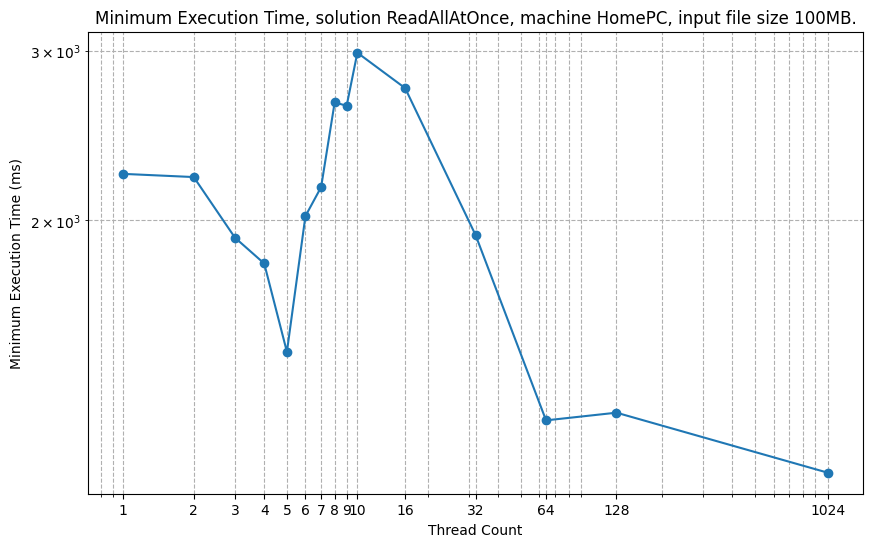

In [232]:
FILESIZE = 100
filepath = f'{SOLUTION_DIR}/execution_times_{FILESIZE}MB.md'

thread_counts, min_times = parse_markdown(filepath)
plot_min_times(thread_counts, min_times, FILESIZE, MACHINE, SOLUTION_DIR)

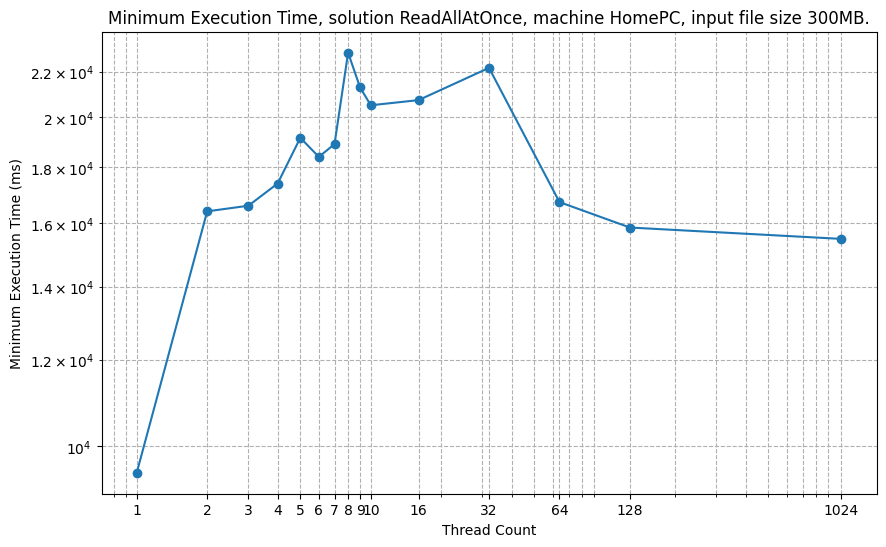

In [233]:
FILESIZE = 300
filepath = f'{SOLUTION_DIR}/execution_times_{FILESIZE}MB.md'

thread_counts, min_times = parse_markdown(filepath)
plot_min_times(thread_counts, min_times, FILESIZE, MACHINE, SOLUTION_DIR)

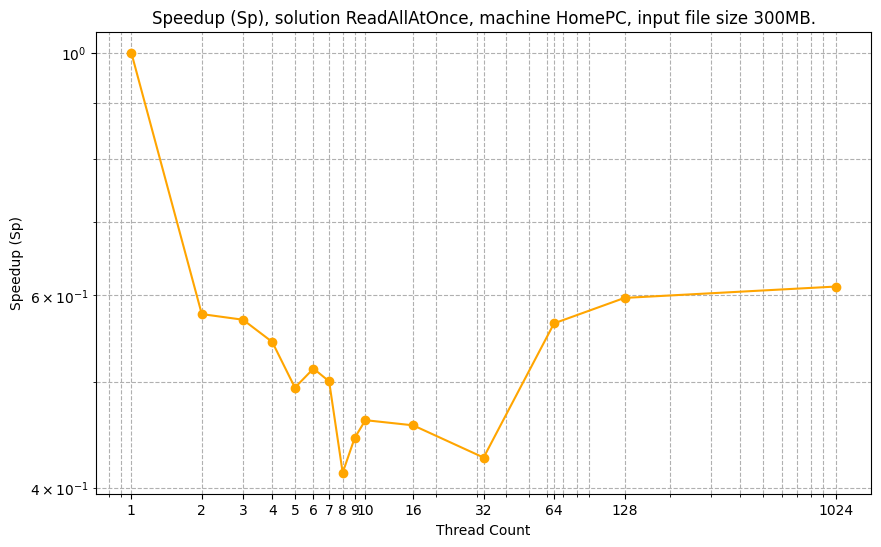

In [234]:
thread_counts, efficiency = parse_markdown(filepath, right_group=8)
plot_sp_values(thread_counts, efficiency, FILESIZE, MACHINE, SOLUTION_DIR)

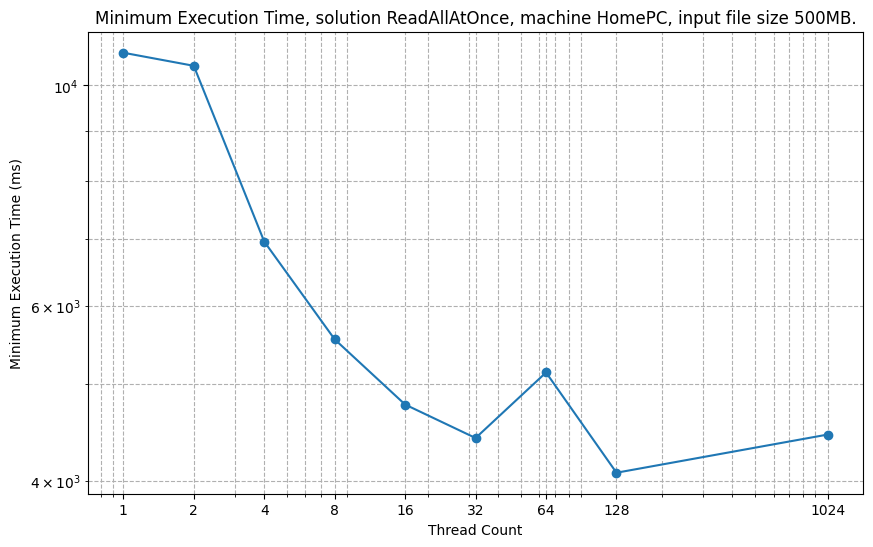

In [235]:
FILESIZE = 500
filepath = f'{SOLUTION_DIR}/execution_times_{FILESIZE}MB.md'

thread_counts, min_times = parse_markdown(filepath)
plot_min_times(thread_counts, min_times, FILESIZE, MACHINE, SOLUTION_DIR)

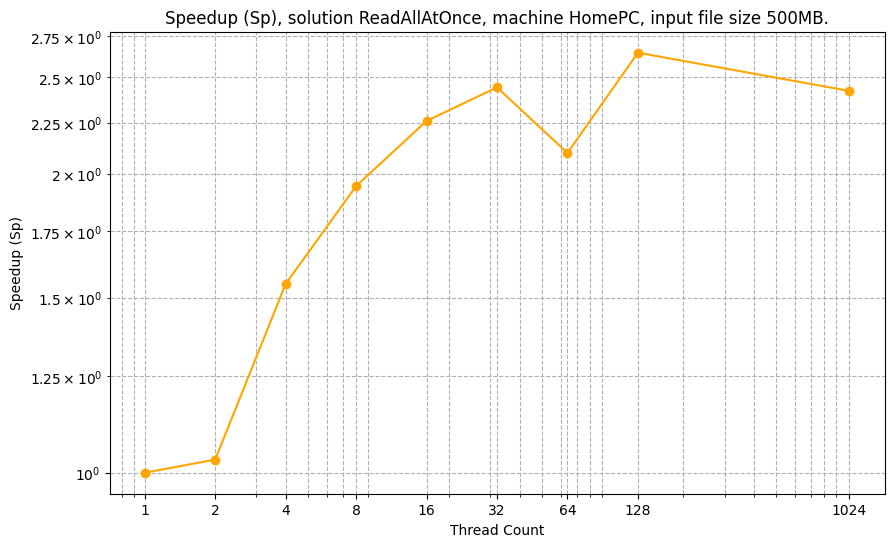

In [236]:
thread_counts, efficiency = parse_markdown(filepath, right_group=8)
plot_sp_values(thread_counts, efficiency, FILESIZE, MACHINE, SOLUTION_DIR)

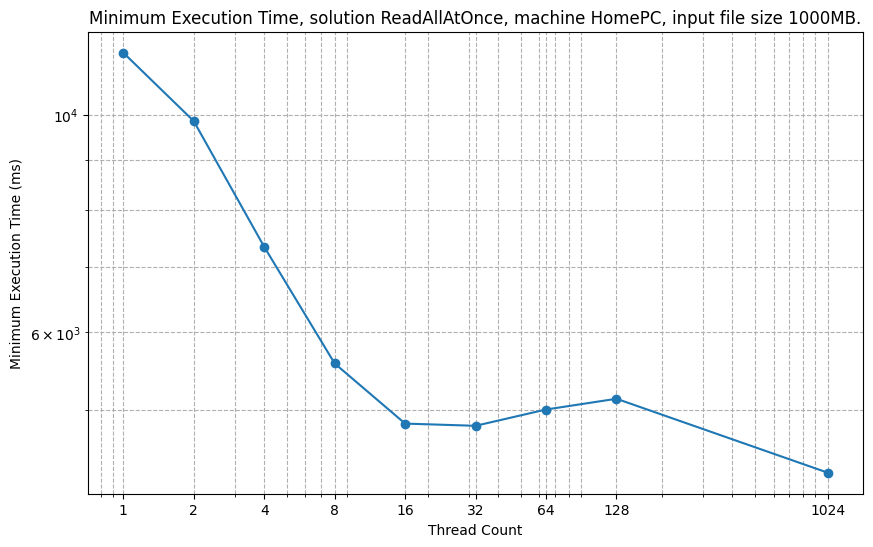

In [237]:
FILESIZE = 1000
filepath = f'{SOLUTION_DIR}/execution_times_{FILESIZE}MB.md'

thread_counts, min_times = parse_markdown(filepath)
plot_min_times(thread_counts, min_times, FILESIZE, MACHINE, SOLUTION_DIR)

In [238]:
MACHINE = "t5600"


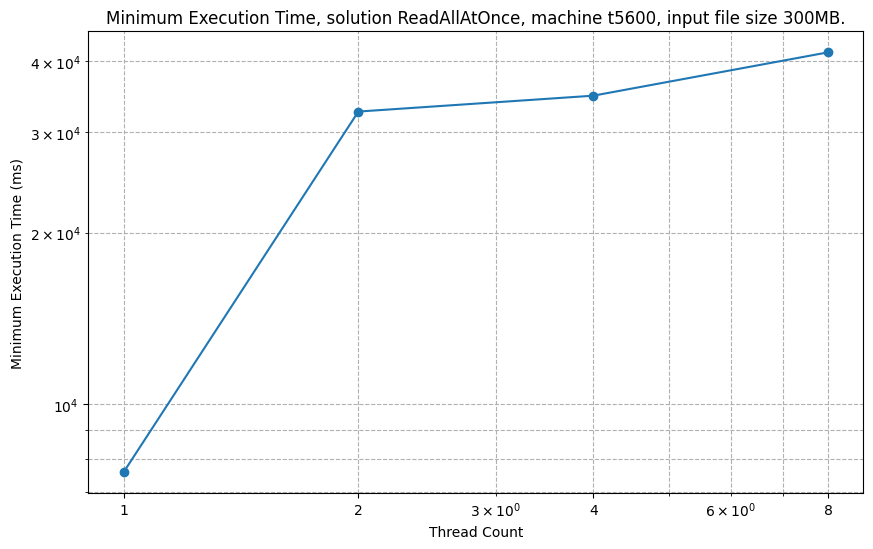

In [239]:
FILESIZE = 300
filepath = f'{SOLUTION_DIR}/execution_times_{FILESIZE}MB_{MACHINE}.md'

thread_counts, min_times = parse_markdown(filepath)
plot_min_times(thread_counts, min_times, FILESIZE, MACHINE, SOLUTION_DIR)

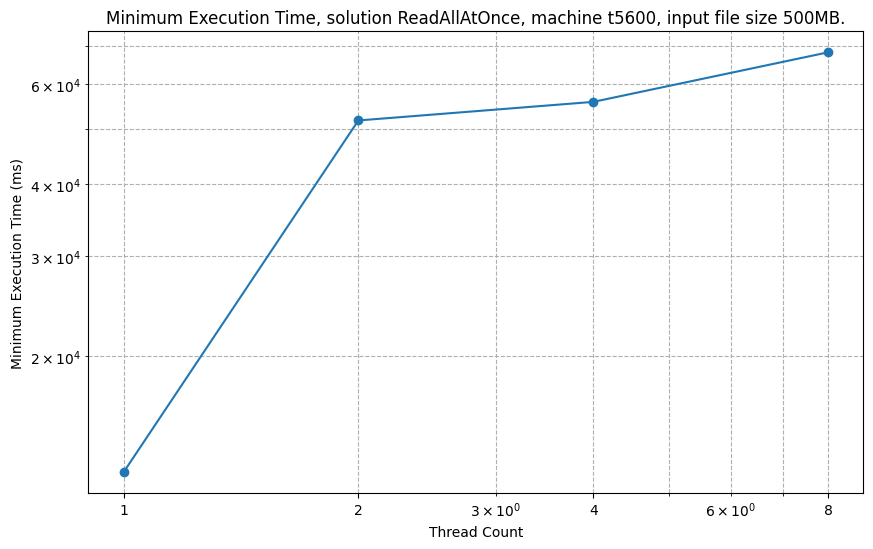

In [240]:
FILESIZE = 500
filepath = f'{SOLUTION_DIR}/execution_times_{FILESIZE}MB_{MACHINE}.md'

thread_counts, min_times = parse_markdown(filepath)
plot_min_times(thread_counts, min_times, FILESIZE, MACHINE, SOLUTION_DIR)

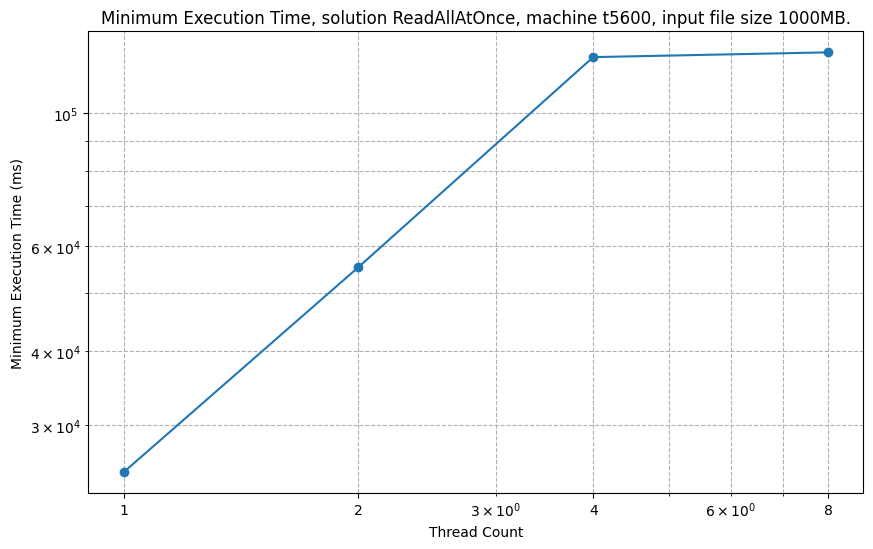

In [241]:
FILESIZE = 1000
filepath = f'{SOLUTION_DIR}/execution_times_{FILESIZE}MB_{MACHINE}.md'

thread_counts, min_times = parse_markdown(filepath)
plot_min_times(thread_counts, min_times, FILESIZE, MACHINE, SOLUTION_DIR)

# ReadChunks

In [242]:
import re
import matplotlib.pyplot as plt


def parse_new_table(filepath):
    with open(filepath, 'r') as file:
        lines = file.readlines()

    data = {}
    # Regex to extract the relevant data
    regex = re.compile(
        r'\|\s*(\d+)\s*\|\s*(\d+)\s*\|\s*(\d+)\s*\|\s*([\d.]+)\s*\|\s*(\d+)ms\s*\|\s*(\d+)ms\s*\|\s*(\d+)ms\s*\|\s*(\d+)ms\s*\|\s*([\d.]+)\s*\|\s*([\d.]+)\s*\|')

    for line in lines[2:]:  # Skip the header lines
        match = regex.match(line)
        if match:
            chunk_size = int(match.group(1))
            thread_count = int(match.group(3))
            tp_min = int(match.group(8))
            sp = float(match.group(9))
            ep = float(match.group(10))

            if chunk_size not in data:
                data[chunk_size] = {'thread_counts': [], 'tp_min': [], 'sp': [], 'ep': []}

            data[chunk_size]['thread_counts'].append(thread_count)
            data[chunk_size]['tp_min'].append(tp_min)
            data[chunk_size]['sp'].append(sp)
            data[chunk_size]['ep'].append(ep)

    return data


def plot_chunk_size_vs_tp_min(data, solution, machine, filesize, chunk_sizes=None, main_title="Processing Time vs Thread Count", y_label='Tp(min) (ms)', x_label='Thread Count'):
    plt.figure(figsize=(10, 6))
    if not chunk_sizes:
        chunk_sizes_keys = data.keys()

    for chunk_size in chunk_sizes_keys:
        if chunk_size in data:
            plt.plot(data[chunk_size]['thread_counts'], data[chunk_size]
                     ['tp_min'], marker='o', label=f'Chunk Size {chunk_size} KB')

    plt.title(
        f'{main_title}, solution {solution}, machine {machine}, input file size {filesize}MB.')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True, which="both", ls="--")
    plt.legend()
    plt.savefig(f'img/{solution}_{filesize}_{machine}_times')
    plt.show()

def plot_chunk_size_vs_sp(data, solution, machine, filesize, chunk_sizes=None, main_title="Speedup vs Thread Count", y_label='Speedup (Sp)', x_label='Thread Count'):
    plt.figure(figsize=(10, 6))
    chunk_sizes_keys = chunk_sizes if chunk_sizes else data.keys()

    for chunk_size in chunk_sizes_keys:
        if chunk_size in data:
            plt.plot(data[chunk_size]['thread_counts'], data[chunk_size]['sp'], marker='o', label=f'Chunk Size {chunk_size} KB')

    plt.title(f'{main_title}, solution {solution}, machine {machine}, input file size {filesize}MB.')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xscale('log')
    plt.grid(True, which="both", ls="--")
    plt.legend()
    plt.savefig(f'img/{solution}_{filesize}_{machine}_sp')
    plt.show()

def plot_chunk_size_vs_ep(data, solution, machine, filesize, chunk_sizes=None, main_title="Efficiency vs Thread Count", y_label='Efficiency (Ep)', x_label='Thread Count'):
    plt.figure(figsize=(10, 6))
    chunk_sizes_keys = chunk_sizes if chunk_sizes else data.keys()

    for chunk_size in chunk_sizes_keys:
        if chunk_size in data:
            plt.plot(data[chunk_size]['thread_counts'], data[chunk_size]['ep'], marker='o', label=f'Chunk Size {chunk_size} KB')

    plt.title(f'{main_title}, solution {solution}, machine {machine}, input file size {filesize}MB.')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xscale('log')
    plt.grid(True, which="both", ls="--")
    plt.legend()
    plt.savefig(f'img/{solution}_{filesize}_{machine}_ep')
    plt.show()

In [243]:
SOLUTION_DIR = "ReadChunks"
MACHINE = "HomePC"

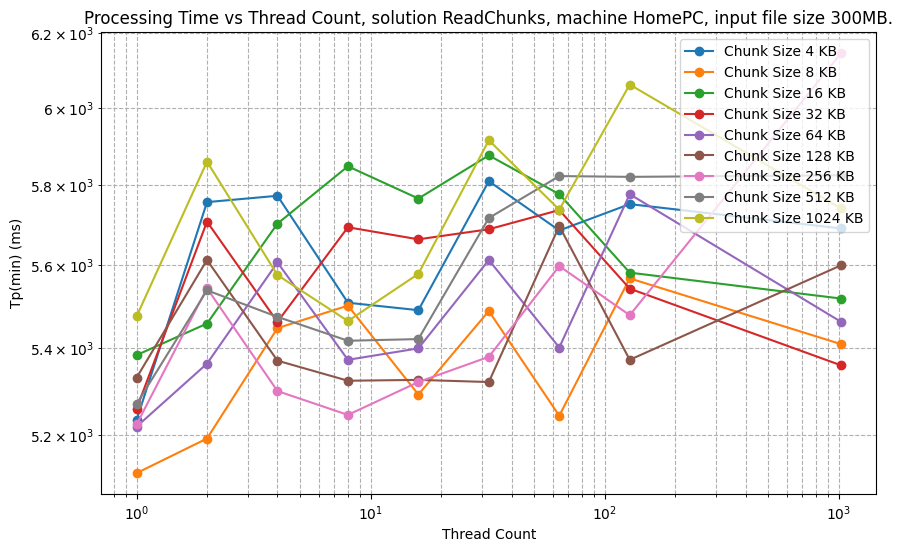

In [244]:
FILESIZE = 300
filepath = f'{SOLUTION_DIR}/execution_times_{FILESIZE}MB.md'

data = parse_new_table(filepath)
plot_chunk_size_vs_tp_min(data, SOLUTION_DIR, MACHINE, FILESIZE)

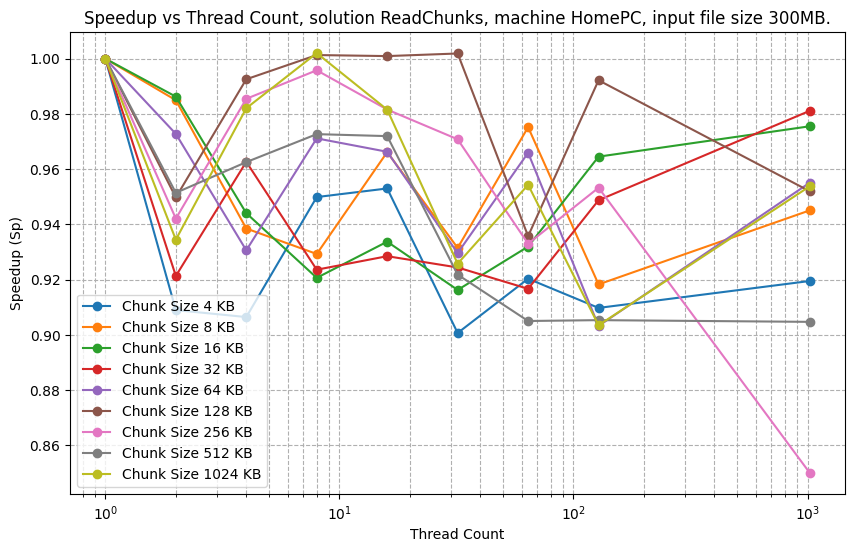

In [245]:
plot_chunk_size_vs_sp(data, SOLUTION_DIR, MACHINE, FILESIZE)

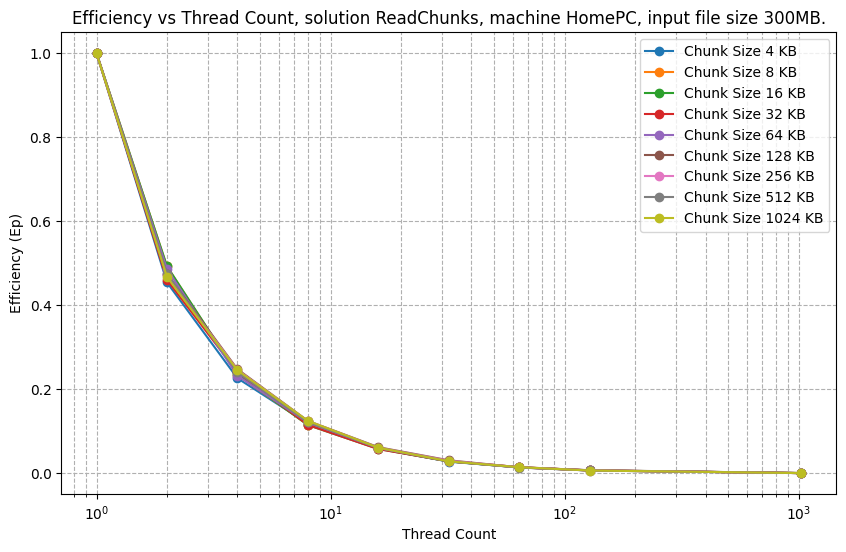

In [246]:
plot_chunk_size_vs_ep(data, SOLUTION_DIR, MACHINE, FILESIZE)

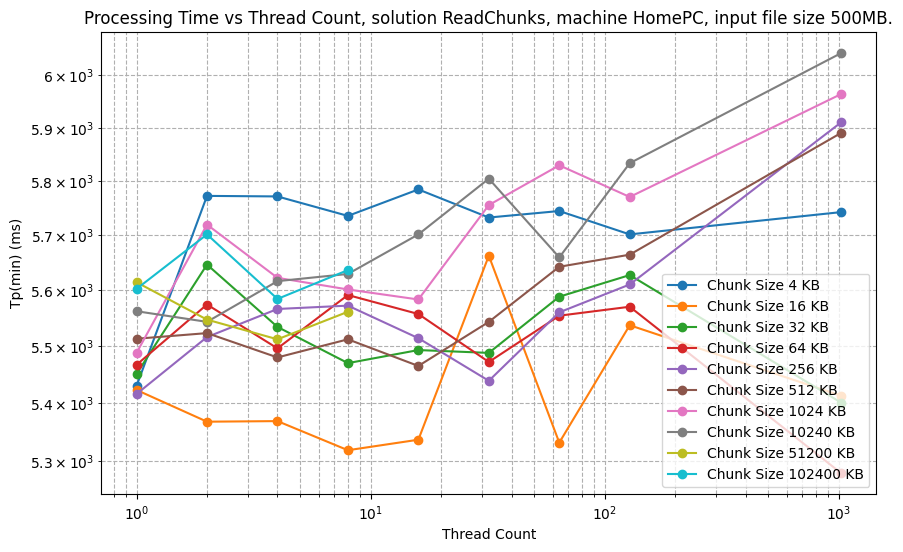

In [247]:
FILESIZE = 500
filepath = f'{SOLUTION_DIR}/execution_times_{FILESIZE}MB.md'

data = parse_new_table(filepath)
plot_chunk_size_vs_tp_min(data, SOLUTION_DIR, MACHINE, FILESIZE)

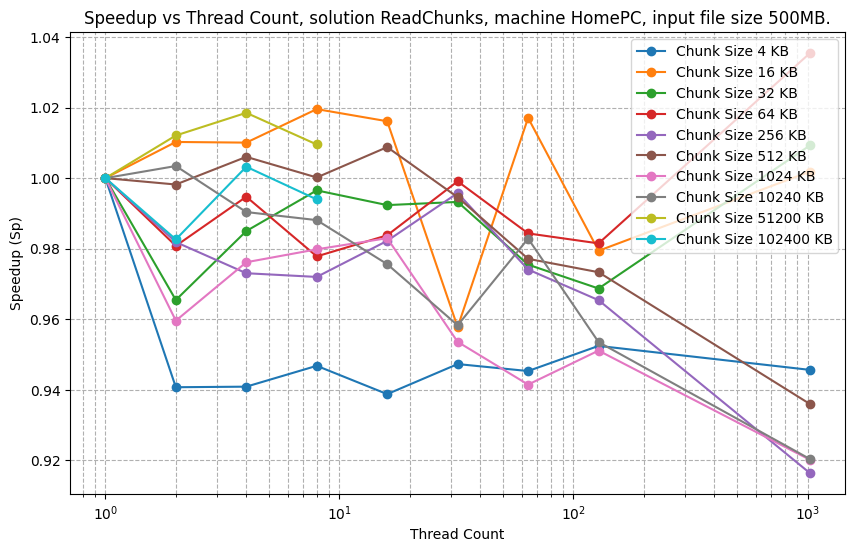

In [248]:
plot_chunk_size_vs_sp(data, SOLUTION_DIR, MACHINE, FILESIZE)

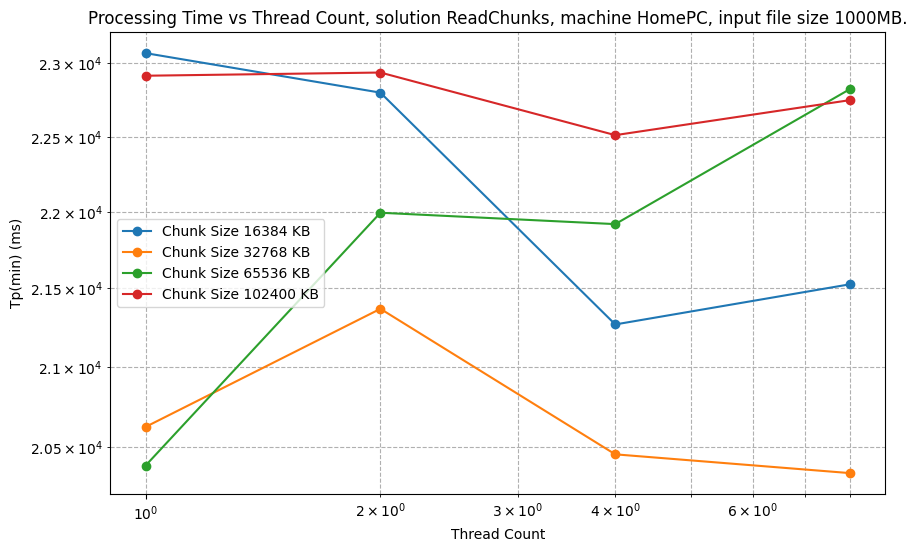

In [249]:
FILESIZE = 1000
filepath = f'{SOLUTION_DIR}/execution_times_{FILESIZE}MB.md'

data = parse_new_table(filepath)
plot_chunk_size_vs_tp_min(data, SOLUTION_DIR, MACHINE, FILESIZE)

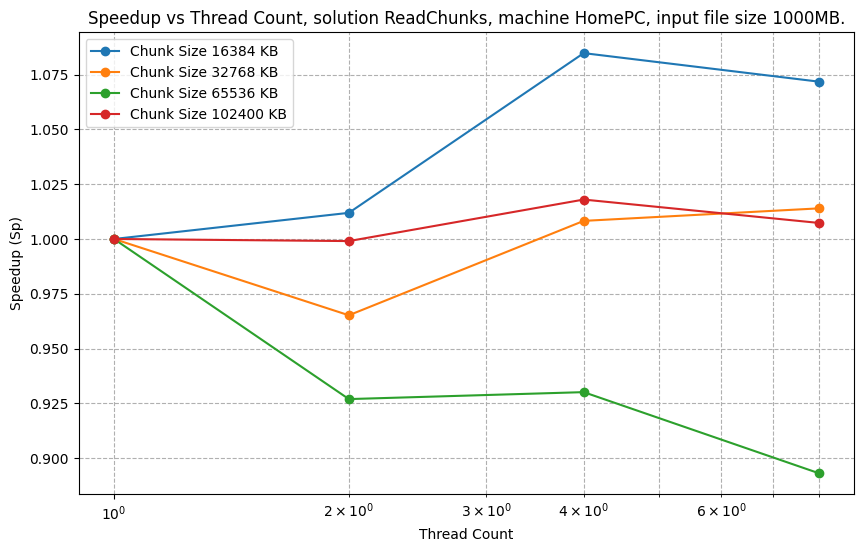

In [250]:
plot_chunk_size_vs_sp(data, SOLUTION_DIR, MACHINE, FILESIZE)

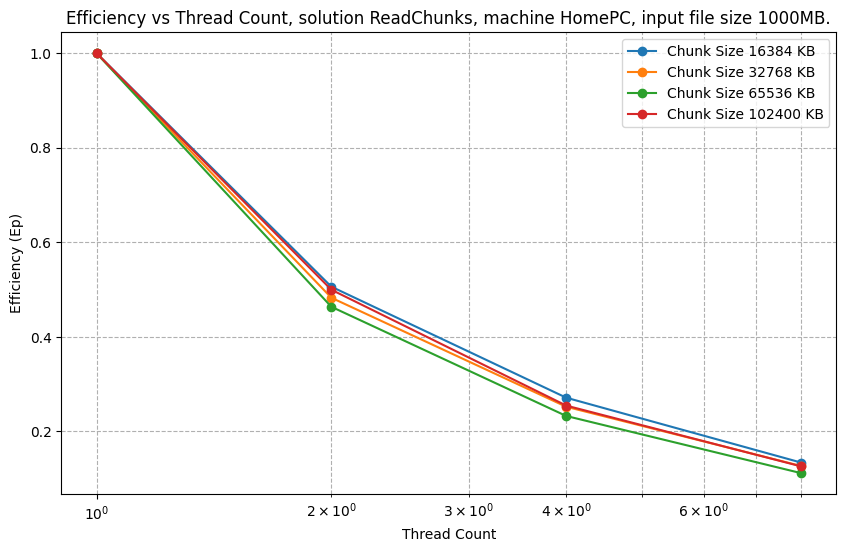

In [251]:
plot_chunk_size_vs_ep(data, SOLUTION_DIR, MACHINE, FILESIZE)

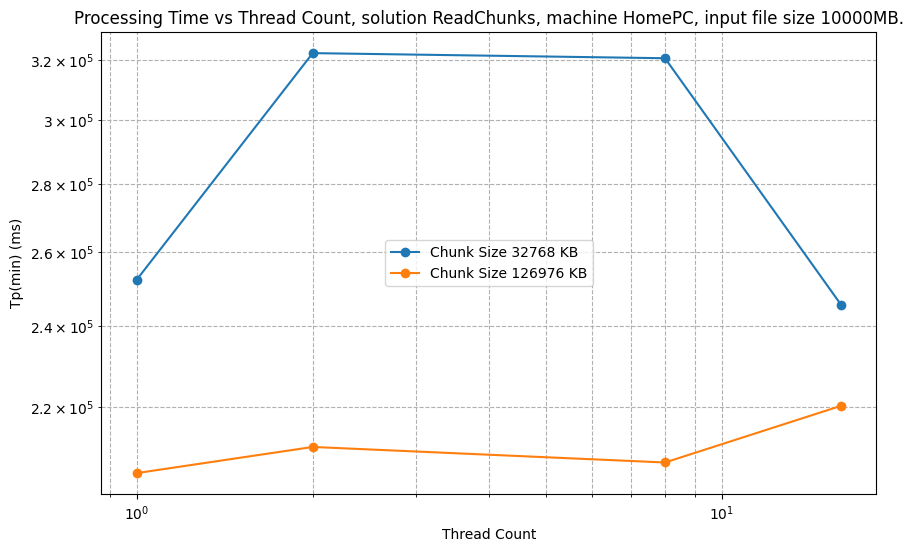

In [252]:
FILESIZE = 10000
filepath = f'{SOLUTION_DIR}/execution_times_{FILESIZE}MB.md'

data = parse_new_table(filepath)
plot_chunk_size_vs_tp_min(data, SOLUTION_DIR, MACHINE, FILESIZE)

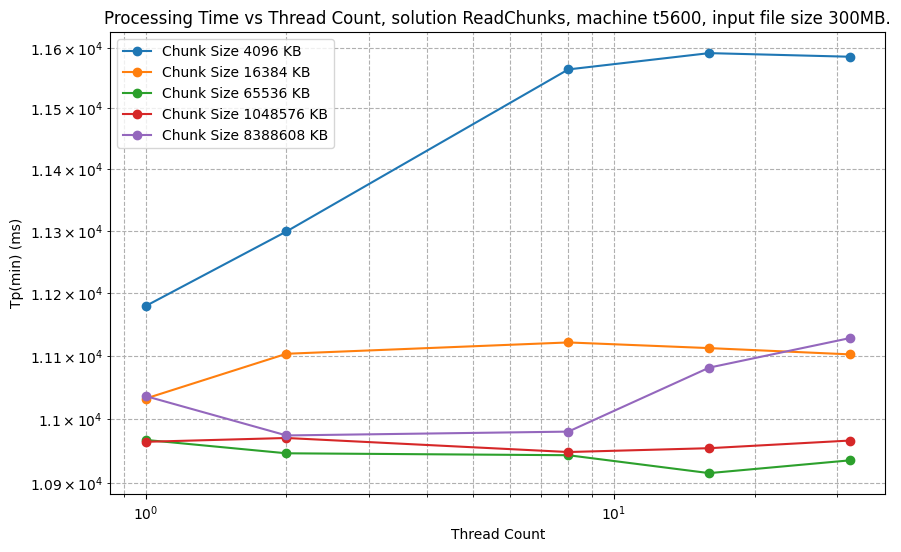

In [253]:
FILESIZE = 300
MACHINE = "t5600"
filepath = f'{SOLUTION_DIR}/execution_times_{FILESIZE}MB_{MACHINE}.md'

data = parse_new_table(filepath)
plot_chunk_size_vs_tp_min(data, SOLUTION_DIR, MACHINE, FILESIZE)

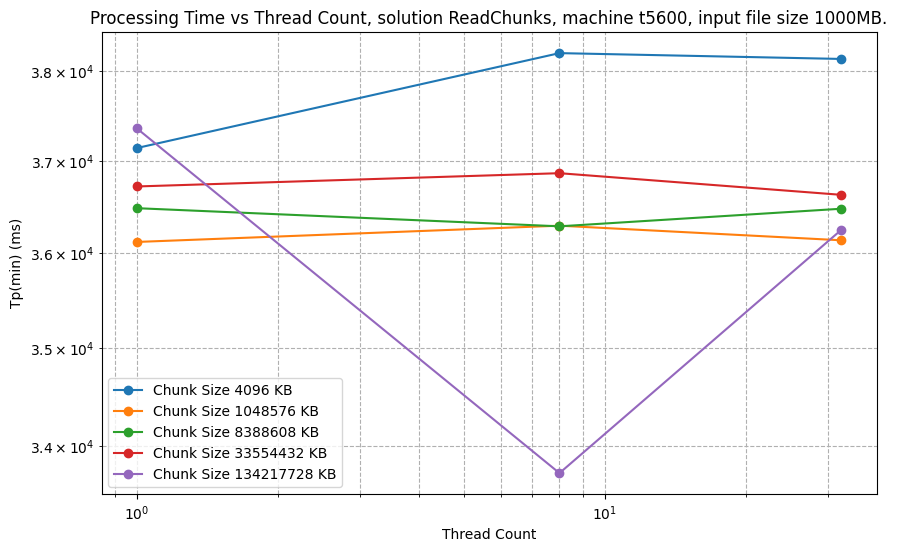

In [254]:
FILESIZE = 1000
MACHINE = "t5600"
filepath = f'{SOLUTION_DIR}/execution_times_{FILESIZE}MB_{MACHINE}.md'

data = parse_new_table(filepath)
plot_chunk_size_vs_tp_min(data, SOLUTION_DIR, MACHINE, FILESIZE)